In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(461.4626)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 620.93013  validloss 891.15529±0.00000  bestvalidloss 891.15529  last_update 0
train: iter 1  trainloss 315.94644  validloss 321.39160±0.00000  bestvalidloss 321.39160  last_update 0
train: iter 2  trainloss 57.94719  validloss 174.41492±0.00000  bestvalidloss 174.41492  last_update 0
train: iter 3  trainloss 170.15096  validloss -152.45597±0.00000  bestvalidloss -152.45597  last_update 0
train: iter 4  trainloss -12.96336  validloss 35.38015±0.00000  bestvalidloss -152.45597  last_update 1
train: iter 5  trainloss -237.65913  validloss -128.93737±0.00000  bestvalidloss -152.45597  last_update 2
train: iter 6  trainloss -393.68857  validloss -316.74887±0.00000  bestvalidloss -316.74887  last_update 0
train: iter 7  trainloss -499.31234  validloss -486.32368±0.00000  bestvalidloss -486.32368  last_update 0
train: iter 8  trainloss -606.23721  validloss -635.00987±0.00000  bestvalidloss -635.00987  last_update 0
train: iter 9  trainloss -740.72

train: iter 76  trainloss -1655.19805  validloss -1748.96099±0.00000  bestvalidloss -1795.36078  last_update 5
train: iter 77  trainloss -1692.21599  validloss -1751.11776±0.00000  bestvalidloss -1795.36078  last_update 6
train: iter 78  trainloss -1659.53275  validloss -1705.96212±0.00000  bestvalidloss -1795.36078  last_update 7
train: iter 79  trainloss -1749.45957  validloss -1827.72565±0.00000  bestvalidloss -1827.72565  last_update 0
train: iter 80  trainloss -1731.41129  validloss -1841.04886±0.00000  bestvalidloss -1841.04886  last_update 0
train: iter 81  trainloss -1718.90997  validloss -1763.94837±0.00000  bestvalidloss -1841.04886  last_update 1
train: iter 82  trainloss -1693.34551  validloss -1768.60418±0.00000  bestvalidloss -1841.04886  last_update 2
train: iter 83  trainloss -1723.09277  validloss -1806.67796±0.00000  bestvalidloss -1841.04886  last_update 3
train: iter 84  trainloss -1556.13604  validloss -1761.29420±0.00000  bestvalidloss -1841.04886  last_update 4
t

train: iter 150  trainloss -1517.56639  validloss -1867.20308±0.00000  bestvalidloss -1984.63318  last_update 7
train: iter 151  trainloss -1504.67358  validloss -1759.64028±0.00000  bestvalidloss -1984.63318  last_update 8
train: iter 152  trainloss -1901.05466  validloss -1977.68381±0.00000  bestvalidloss -1984.63318  last_update 9
train: iter 153  trainloss -1917.06073  validloss -1964.72028±0.00000  bestvalidloss -1984.63318  last_update 10
train: iter 154  trainloss -1906.13729  validloss -1960.18792±0.00000  bestvalidloss -1984.63318  last_update 11
train: iter 155  trainloss -1897.27245  validloss -1911.87846±0.00000  bestvalidloss -1984.63318  last_update 12
train: iter 156  trainloss -1890.72168  validloss -1971.99378±0.00000  bestvalidloss -1984.63318  last_update 13
train: iter 157  trainloss -1894.96298  validloss -1991.63471±0.00000  bestvalidloss -1991.63471  last_update 0
train: iter 158  trainloss -1859.05847  validloss -1952.02333±0.00000  bestvalidloss -1991.63471  la

train: iter 223  trainloss -1949.60307  validloss -1977.12345±0.00000  bestvalidloss -2038.38027  last_update 6
train: iter 224  trainloss -1915.43114  validloss -2010.92658±0.00000  bestvalidloss -2038.38027  last_update 7
train: iter 225  trainloss -1950.47409  validloss -2029.15928±0.00000  bestvalidloss -2038.38027  last_update 8
train: iter 226  trainloss -1841.27735  validloss -2026.24365±0.00000  bestvalidloss -2038.38027  last_update 9
train: iter 227  trainloss -1967.02360  validloss -2023.90725±0.00000  bestvalidloss -2038.38027  last_update 10
train: iter 228  trainloss -1809.18220  validloss -2022.93741±0.00000  bestvalidloss -2038.38027  last_update 11
train: iter 229  trainloss -1867.51933  validloss -1952.03064±0.00000  bestvalidloss -2038.38027  last_update 12
train: iter 230  trainloss -1962.57716  validloss -1943.35278±0.00000  bestvalidloss -2038.38027  last_update 13
train: iter 231  trainloss -1961.67901  validloss -2037.38256±0.00000  bestvalidloss -2038.38027  la

train: iter 296  trainloss -1866.88600  validloss -2014.11044±0.00000  bestvalidloss -2067.78302  last_update 17
train: iter 297  trainloss -1987.87833  validloss -2031.61054±0.00000  bestvalidloss -2067.78302  last_update 18
train: iter 298  trainloss -1959.73317  validloss -2036.12396±0.00000  bestvalidloss -2067.78302  last_update 19
train: iter 299  trainloss -1988.35941  validloss -2051.67338±0.00000  bestvalidloss -2067.78302  last_update 20
train: iter 300  trainloss -1959.63590  validloss -2002.12250±0.00000  bestvalidloss -2067.78302  last_update 21
train: iter 301  trainloss -1978.43756  validloss -2038.55043±0.00000  bestvalidloss -2067.78302  last_update 22
train: iter 302  trainloss -1858.14618  validloss -2030.15551±0.00000  bestvalidloss -2067.78302  last_update 23
train: iter 303  trainloss -2002.50984  validloss -2060.76373±0.00000  bestvalidloss -2067.78302  last_update 24
train: iter 304  trainloss -2008.90878  validloss -2010.31691±0.00000  bestvalidloss -2067.78302

train: iter 369  trainloss -1999.89306  validloss -2070.69756±0.00000  bestvalidloss -2077.12347  last_update 5
train: iter 370  trainloss -2004.19011  validloss -2046.36265±0.00000  bestvalidloss -2077.12347  last_update 6
train: iter 371  trainloss -1946.16742  validloss -2068.54434±0.00000  bestvalidloss -2077.12347  last_update 7
train: iter 372  trainloss -1976.85500  validloss -1946.87269±0.00000  bestvalidloss -2077.12347  last_update 8
train: iter 373  trainloss -2006.09865  validloss -2037.00803±0.00000  bestvalidloss -2077.12347  last_update 9
train: iter 374  trainloss -2041.41824  validloss -2040.66169±0.00000  bestvalidloss -2077.12347  last_update 10
train: iter 375  trainloss -2034.33043  validloss -2081.46097±0.00000  bestvalidloss -2081.46097  last_update 0
train: iter 376  trainloss -1882.43757  validloss -2032.33961±0.00000  bestvalidloss -2081.46097  last_update 1
train: iter 377  trainloss -1945.09197  validloss -1723.08101±0.00000  bestvalidloss -2081.46097  last_

train: iter 442  trainloss -2045.02856  validloss -2090.45513±0.00000  bestvalidloss -2095.59241  last_update 11
train: iter 443  trainloss -2058.17676  validloss -2081.36866±0.00000  bestvalidloss -2095.59241  last_update 12
train: iter 444  trainloss -2059.14861  validloss -2072.39702±0.00000  bestvalidloss -2095.59241  last_update 13
train: iter 445  trainloss -2060.93864  validloss -2069.31141±0.00000  bestvalidloss -2095.59241  last_update 14
train: iter 446  trainloss -2037.34765  validloss -2082.66949±0.00000  bestvalidloss -2095.59241  last_update 15
train: iter 447  trainloss -2041.68016  validloss -2070.46690±0.00000  bestvalidloss -2095.59241  last_update 16
train: iter 448  trainloss -1977.63928  validloss -2010.03268±0.00000  bestvalidloss -2095.59241  last_update 17
train: iter 449  trainloss -2019.74066  validloss -2021.70428±0.00000  bestvalidloss -2095.59241  last_update 18
train: iter 450  trainloss -2032.31177  validloss -2035.72972±0.00000  bestvalidloss -2095.59241

train: iter 515  trainloss -2054.05681  validloss -2078.61642±0.00000  bestvalidloss -2105.66525  last_update 10
train: iter 516  trainloss -2075.06033  validloss -2102.27964±0.00000  bestvalidloss -2105.66525  last_update 11
train: iter 517  trainloss -1974.67318  validloss -2081.48633±0.00000  bestvalidloss -2105.66525  last_update 12
train: iter 518  trainloss -2008.38617  validloss -2075.60179±0.00000  bestvalidloss -2105.66525  last_update 13
train: iter 519  trainloss -2059.10508  validloss -2069.82126±0.00000  bestvalidloss -2105.66525  last_update 14
train: iter 520  trainloss -2076.36759  validloss -2098.42325±0.00000  bestvalidloss -2105.66525  last_update 15
train: iter 521  trainloss -2049.67649  validloss -2095.12773±0.00000  bestvalidloss -2105.66525  last_update 16
train: iter 522  trainloss -2069.94314  validloss -2051.36115±0.00000  bestvalidloss -2105.66525  last_update 17
train: iter 523  trainloss -1978.43494  validloss -2097.33707±0.00000  bestvalidloss -2105.66525

train: iter 588  trainloss -2015.04977  validloss -1985.10687±0.00000  bestvalidloss -2110.82211  last_update 16
train: iter 589  trainloss -2072.34436  validloss -2057.02337±0.00000  bestvalidloss -2110.82211  last_update 17
train: iter 590  trainloss -2073.57883  validloss -2091.95955±0.00000  bestvalidloss -2110.82211  last_update 18
train: iter 591  trainloss -2056.47641  validloss -2086.16995±0.00000  bestvalidloss -2110.82211  last_update 19
train: iter 592  trainloss -2076.17109  validloss -2098.96245±0.00000  bestvalidloss -2110.82211  last_update 20
train: iter 593  trainloss -2081.41093  validloss -2095.43577±0.00000  bestvalidloss -2110.82211  last_update 21
train: iter 594  trainloss -2034.58056  validloss -2073.05308±0.00000  bestvalidloss -2110.82211  last_update 22
train: iter 595  trainloss -2014.67827  validloss -2037.28626±0.00000  bestvalidloss -2110.82211  last_update 23
train: iter 596  trainloss -2074.09043  validloss -2094.00157±0.00000  bestvalidloss -2110.82211

train: iter 661  trainloss -2021.18657  validloss -2062.94470±0.00000  bestvalidloss -2125.30532  last_update 3
train: iter 662  trainloss -1866.39100  validloss -2031.40843±0.00000  bestvalidloss -2125.30532  last_update 4
train: iter 663  trainloss -2072.88052  validloss -2096.07428±0.00000  bestvalidloss -2125.30532  last_update 5
train: iter 664  trainloss -2086.77501  validloss -2110.29614±0.00000  bestvalidloss -2125.30532  last_update 6
train: iter 665  trainloss -2093.30462  validloss -2078.86414±0.00000  bestvalidloss -2125.30532  last_update 7
train: iter 666  trainloss -2084.12652  validloss -2098.17617±0.00000  bestvalidloss -2125.30532  last_update 8
train: iter 667  trainloss -2090.14101  validloss -2093.33058±0.00000  bestvalidloss -2125.30532  last_update 9
train: iter 668  trainloss -2091.59654  validloss -2092.59772±0.00000  bestvalidloss -2125.30532  last_update 10
train: iter 669  trainloss -2050.48010  validloss -2063.83721±0.00000  bestvalidloss -2125.30532  last_

train: iter 734  trainloss -2088.38103  validloss -2128.96044±0.00000  bestvalidloss -2132.99467  last_update 21
train: iter 735  trainloss -2107.11901  validloss -2102.87092±0.00000  bestvalidloss -2132.99467  last_update 22
train: iter 736  trainloss -2079.11391  validloss -2119.13950±0.00000  bestvalidloss -2132.99467  last_update 23
train: iter 737  trainloss -2052.64121  validloss -2076.64653±0.00000  bestvalidloss -2132.99467  last_update 24
train: iter 738  trainloss -2096.02213  validloss -2096.89724±0.00000  bestvalidloss -2132.99467  last_update 25
train: iter 739  trainloss -2107.48978  validloss -2124.73954±0.00000  bestvalidloss -2132.99467  last_update 26
train: iter 740  trainloss -2096.81205  validloss -2088.84770±0.00000  bestvalidloss -2132.99467  last_update 27
train: iter 741  trainloss -2073.35342  validloss -2051.40549±0.00000  bestvalidloss -2132.99467  last_update 28
train: iter 742  trainloss -2125.11786  validloss -2123.24144±0.00000  bestvalidloss -2132.99467

train: iter 807  trainloss -2114.72409  validloss -2119.18718±0.00000  bestvalidloss -2132.99467  last_update 94
train: iter 808  trainloss -2053.73381  validloss -2089.37264±0.00000  bestvalidloss -2132.99467  last_update 95
train: iter 809  trainloss -2111.52381  validloss -2119.54041±0.00000  bestvalidloss -2132.99467  last_update 96
train: iter 810  trainloss -2122.51480  validloss -2094.82776±0.00000  bestvalidloss -2132.99467  last_update 97
train: iter 811  trainloss -2117.35735  validloss -2116.65587±0.00000  bestvalidloss -2132.99467  last_update 98
train: iter 812  trainloss -2070.44439  validloss -2082.62279±0.00000  bestvalidloss -2132.99467  last_update 99
train: iter 813  trainloss -2076.43306  validloss -2081.37127±0.00000  bestvalidloss -2132.99467  last_update 100
train: fin
penalty_target_min tensor(-12.3174) penalty_target_max tensor(2.6220)


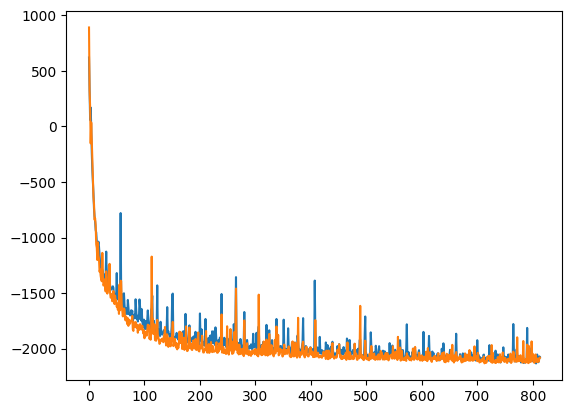

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 5.02309  validloss 5.32781±0.00000  bestvalidloss 5.32781  last_update 0
train: iter 1  trainloss 4.63493  validloss 4.91421±0.00000  bestvalidloss 4.91421  last_update 0
train: iter 2  trainloss 4.30938  validloss 4.55835±0.00000  bestvalidloss 4.55835  last_update 0
train: iter 3  trainloss 4.02650  validloss 4.23827±0.00000  bestvalidloss 4.23827  last_update 0
train: iter 4  trainloss 3.77665  validloss 3.95867±0.00000  bestvalidloss 3.95867  last_update 0
train: iter 5  trainloss 3.55135  validloss 3.72956±0.00000  bestvalidloss 3.72956  last_update 0
train: iter 6  trainloss 3.34970  validloss 3.49363±0.00000  bestvalidloss 3.49363  last_update 0
train: iter 7  trainloss 3.16499  validloss 3.29924±0.00000  bestvalidloss 3.29924  last_update 0
train: iter 8  trainloss 2.98888  validloss 3.10064±0.00000  bestvalidloss 3.10064  last_update 0
train: iter 9  trainloss 2.83184  validloss 2.94465±0.00000  bestvalidloss 2.94465  last_update 0
train: iter 10  trai

train: iter 86  trainloss -0.95594  validloss -1.22594±0.00000  bestvalidloss -1.24877  last_update 1
train: iter 87  trainloss -0.94888  validloss -1.24563±0.00000  bestvalidloss -1.24877  last_update 2
train: iter 88  trainloss -0.94105  validloss -1.22560±0.00000  bestvalidloss -1.24877  last_update 3
train: iter 89  trainloss -0.96697  validloss -1.24832±0.00000  bestvalidloss -1.24877  last_update 4
train: iter 90  trainloss -0.99786  validloss -1.26547±0.00000  bestvalidloss -1.26547  last_update 0
train: iter 91  trainloss -0.98678  validloss -1.25706±0.00000  bestvalidloss -1.26547  last_update 1
train: iter 92  trainloss -0.97437  validloss -1.31574±0.00000  bestvalidloss -1.31574  last_update 0
train: iter 93  trainloss -0.99314  validloss -1.32101±0.00000  bestvalidloss -1.32101  last_update 0
train: iter 94  trainloss -0.98210  validloss -1.24604±0.00000  bestvalidloss -1.32101  last_update 1
train: iter 95  trainloss -1.00895  validloss -1.30140±0.00000  bestvalidloss -1.3

train: iter 175  trainloss -1.00103  validloss -1.34449±0.00000  bestvalidloss -1.39742  last_update 46
train: iter 176  trainloss -1.03150  validloss -1.30401±0.00000  bestvalidloss -1.39742  last_update 47
train: iter 177  trainloss -1.00471  validloss -1.29830±0.00000  bestvalidloss -1.39742  last_update 48
train: iter 178  trainloss -0.99825  validloss -1.35997±0.00000  bestvalidloss -1.39742  last_update 49
train: iter 179  trainloss -0.95936  validloss -1.33647±0.00000  bestvalidloss -1.39742  last_update 50
train: iter 180  trainloss -0.99436  validloss -1.26947±0.00000  bestvalidloss -1.39742  last_update 51
train: iter 181  trainloss -1.00023  validloss -1.30193±0.00000  bestvalidloss -1.39742  last_update 52
train: iter 182  trainloss -0.98222  validloss -1.30490±0.00000  bestvalidloss -1.39742  last_update 53
train: iter 183  trainloss -0.99830  validloss -1.28957±0.00000  bestvalidloss -1.39742  last_update 54
train: iter 184  trainloss -1.00847  validloss -1.32168±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-2.3905, -1.0161, -4.1795, -3.4576], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 100.21775  validloss 115.90938±0.00000  bestvalidloss 115.90938  last_update 0
train: iter 1  trainloss 71.53796  validloss 86.80603±0.00000  bestvalidloss 86.80603  last_update 0
train: iter 2  trainloss 51.19078  validloss 61.15407±0.00000  bestvalidloss 61.15407  last_update 0
train: iter 3  trainloss 38.60254  validloss 45.22568±0.00000  bestvalidloss 45.22568  last_update 0
train: iter 4  trainloss 29.86695  validloss 34.66639±0.00000  bestvalidloss 34.66639  last_update 0
train: iter 5  trainloss 23.57024  validloss 27.18978±0.00000  bestvalidloss 27.18978  last_update 0
train: iter 6  trainloss 18.57471  validloss 21.55093±0.00000  bestvalidloss 21.55093  last_update 0
train: iter 7  trainloss 14.91172  validloss 16.99392±0.00000  bestvalidloss 16.99392  last_update 0
train: iter 8  trainloss 11.89380  validloss 13.54056±0.00000  bestvalidloss 13.54056  last_update 0
train: iter 9  trainloss 9.58335  validloss 10.71907±0.00000  bestvalidloss 10.71907  la

train: iter 85  trainloss 1.78209  validloss 2.05771±0.00000  bestvalidloss 2.05075  last_update 12
train: iter 86  trainloss 1.81440  validloss 2.02554±0.00000  bestvalidloss 2.02554  last_update 0
train: iter 87  trainloss 1.78426  validloss 2.23160±0.00000  bestvalidloss 2.02554  last_update 1
train: iter 88  trainloss 1.80893  validloss 2.05275±0.00000  bestvalidloss 2.02554  last_update 2
train: iter 89  trainloss 1.79753  validloss 2.14792±0.00000  bestvalidloss 2.02554  last_update 3
train: iter 90  trainloss 1.81221  validloss 2.05022±0.00000  bestvalidloss 2.02554  last_update 4
train: iter 91  trainloss 1.79949  validloss 2.22514±0.00000  bestvalidloss 2.02554  last_update 5
train: iter 92  trainloss 1.80157  validloss 2.11770±0.00000  bestvalidloss 2.02554  last_update 6
train: iter 93  trainloss 1.78120  validloss 2.13314±0.00000  bestvalidloss 2.02554  last_update 7
train: iter 94  trainloss 1.79834  validloss 2.05186±0.00000  bestvalidloss 2.02554  last_update 8
train: it

train: iter 167  trainloss 1.74834  validloss 2.15064±0.00000  bestvalidloss 1.93900  last_update 7
train: iter 168  trainloss 1.74318  validloss 2.18820±0.00000  bestvalidloss 1.93900  last_update 8
train: iter 169  trainloss 1.74415  validloss 2.17236±0.00000  bestvalidloss 1.93900  last_update 9
train: iter 170  trainloss 1.76347  validloss 2.04771±0.00000  bestvalidloss 1.93900  last_update 10
train: iter 171  trainloss 1.72464  validloss 2.16910±0.00000  bestvalidloss 1.93900  last_update 11
train: iter 172  trainloss 1.76288  validloss 2.09486±0.00000  bestvalidloss 1.93900  last_update 12
train: iter 173  trainloss 1.75711  validloss 2.15898±0.00000  bestvalidloss 1.93900  last_update 13
train: iter 174  trainloss 1.73747  validloss 2.13605±0.00000  bestvalidloss 1.93900  last_update 14
train: iter 175  trainloss 1.75897  validloss 1.98962±0.00000  bestvalidloss 1.93900  last_update 15
train: iter 176  trainloss 1.74017  validloss 2.05693±0.00000  bestvalidloss 1.93900  last_upd

train: iter 250  trainloss 1.72985  validloss 2.09672±0.00000  bestvalidloss 1.91298  last_update 61
train: iter 251  trainloss 1.71586  validloss 2.05149±0.00000  bestvalidloss 1.91298  last_update 62
train: iter 252  trainloss 1.73459  validloss 2.10184±0.00000  bestvalidloss 1.91298  last_update 63
train: iter 253  trainloss 1.75225  validloss 2.26311±0.00000  bestvalidloss 1.91298  last_update 64
train: iter 254  trainloss 1.70369  validloss 2.18565±0.00000  bestvalidloss 1.91298  last_update 65
train: iter 255  trainloss 1.74193  validloss 2.04342±0.00000  bestvalidloss 1.91298  last_update 66
train: iter 256  trainloss 1.72574  validloss 2.03590±0.00000  bestvalidloss 1.91298  last_update 67
train: iter 257  trainloss 1.73751  validloss 2.00254±0.00000  bestvalidloss 1.91298  last_update 68
train: iter 258  trainloss 1.73445  validloss 2.01974±0.00000  bestvalidloss 1.91298  last_update 69
train: iter 259  trainloss 1.76063  validloss 2.26300±0.00000  bestvalidloss 1.91298  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-11.0437)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(4.3481)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.8594555714535662
tensor([0.1972])
